In [7]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [8]:
header_names = ['Client ID', 'Client Name', 'Feedback']
df = pd.read_csv('NLK Sentiment Training.csv', nrows = 10001, header = None, skiprows = 1, names = header_names)
df

,Client ID,Client Name,Feedback
0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,joy_wolf,@Kwesidei not the whole crew
...,...,...,...
9996,1550731192,matmurray,@Dandy_Sephy No. Only close friends and family...
9997,1550731281,lexabuckets,CRAP! After looking when I last tweeted... WHY...
9998,1550731500,AmberKarley,Its Another Rainboot day
9999,1550731750,ARoadRetraveled,I think there's a problem with the ISP in this...


In [3]:
df.head()

,Client ID,Client Name,Feedback
0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,joy_wolf,@Kwesidei not the whole crew


In [9]:
df.tail(10)

,Client ID,Client Name,Feedback
9991,1550729424,niknik11,still has tooth ache
9992,1550729560,cassidyleah,GEORGOUS day Pittsburgh! Going for a run then ...
9993,1550729610,bazzmatti,Why cant people get it in there head that ive ...
9994,1550729779,thedoyleswife,Aww that's sad
9995,1550730633,gia_revenge,stupid dvds stuffing up the good bits in jaws.
9996,1550731192,matmurray,@Dandy_Sephy No. Only close friends and family...
9997,1550731281,lexabuckets,CRAP! After looking when I last tweeted... WHY...
9998,1550731500,AmberKarley,Its Another Rainboot day
9999,1550731750,ARoadRetraveled,I think there's a problem with the ISP in this...
10000,1550731779,brendandebeasi,@ nawong How do I go about getting access to i...


In [10]:
df.describe()

,Client ID
count,1.000100e+04
mean,1.480299e+09
std,2.799301e+07
min,1.467811e+09
25%,1.468390e+09
50%,1.468964e+09
75%,1.469842e+09
max,1.550732e+09


In [11]:
df.shape

(10001, 3)

In [12]:
df.isnull().sum()

Client ID      0
Client Name    0
Feedback       0
dtype: int64

In [13]:
df.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Length: 10001, dtype: int64

In [14]:
df['Feedback'].values[0]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [15]:
df['Feedback'].values[10000]

"@ nawong How do I go about getting access to idzr.org I'm dying to try it out "

In [16]:
example1 = df['Feedback'][40]
example1

"He's the reason for the teardrops on my guitar the only one who has enough of me to break my heart "

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [18]:
sia = SentimentIntensityAnalyzer()

In [19]:
example1

"He's the reason for the teardrops on my guitar the only one who has enough of me to break my heart "

In [20]:
sia.polarity_scores(example1)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [22]:
feedback = df.drop(columns=['Client ID', 'Client Name'])
feedback

,Feedback
0,is upset that he can't update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all...."
4,@Kwesidei not the whole crew
...,...
9996,@Dandy_Sephy No. Only close friends and family...
9997,CRAP! After looking when I last tweeted... WHY...
9998,Its Another Rainboot day
9999,I think there's a problem with the ISP in this...


In [28]:
res ={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Feedback']
    ID = row['Client ID']
    res[ID] = sia.polarity_scores(text)

  0%|          | 0/10001 [00:00<?, ?it/s]

In [29]:
res

{1467810672: {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75},
 1467810917: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4939},
 1467811184: {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'compound': -0.25},
 1467811193: {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.6597},
 1467811372: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1467811592: {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767},
 1467811594: {'neg': 0.093, 'neu': 0.548, 'pos': 0.359, 'compound': 0.745},
 1467811795: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1467812025: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1467812416: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1467812579: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1467812723: {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.5994},
 1467812771: {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.1027},
 1467812784: {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'com

In [51]:
views= pd.DataFrame(res).T
views

,neg,neu,pos,compound
1467810672,0.303,0.697,0.000,-0.7500
1467810917,0.000,0.833,0.167,0.4939
1467811184,0.321,0.500,0.179,-0.2500
1467811193,0.241,0.759,0.000,-0.6597
1467811372,0.000,1.000,0.000,0.0000
...,...,...,...,...
1550731192,0.135,0.675,0.190,0.2263
1550731281,0.179,0.821,0.000,-0.6016
1550731500,0.000,1.000,0.000,0.0000
1550731750,0.114,0.886,0.000,-0.4019


In [52]:
views = views.reset_index().rename(columns={'Index' :'ID'})
views

,index,neg,neu,pos,compound
0,1467810672,0.303,0.697,0.000,-0.7500
1,1467810917,0.000,0.833,0.167,0.4939
2,1467811184,0.321,0.500,0.179,-0.2500
3,1467811193,0.241,0.759,0.000,-0.6597
4,1467811372,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
9996,1550731192,0.135,0.675,0.190,0.2263
9997,1550731281,0.179,0.821,0.000,-0.6016
9998,1550731500,0.000,1.000,0.000,0.0000
9999,1550731750,0.114,0.886,0.000,-0.4019


In [53]:
views.head()

,index,neg,neu,pos,compound
0,1467810672,0.303,0.697,0.000,-0.7500
1,1467810917,0.000,0.833,0.167,0.4939
2,1467811184,0.321,0.500,0.179,-0.2500
3,1467811193,0.241,0.759,0.000,-0.6597
4,1467811372,0.000,1.000,0.000,0.0000


In [54]:
views.tail()

,index,neg,neu,pos,compound
9996,1550731192,0.135,0.675,0.19,0.2263
9997,1550731281,0.179,0.821,0.00,-0.6016
9998,1550731500,0.000,1.000,0.00,0.0000
9999,1550731750,0.114,0.886,0.00,-0.4019
10000,1550731779,0.000,1.000,0.00,0.0000


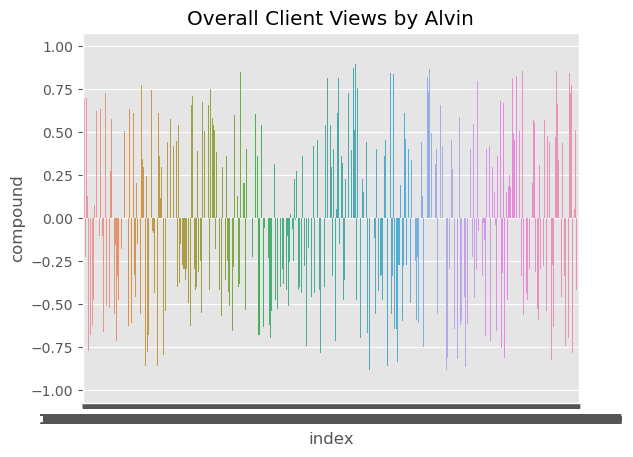

In [57]:
overall_views = sns.barplot(data=views , x='index', y = 'compound')
overall_views.set_title('Overall Client Views by Alvin')
plt.show()

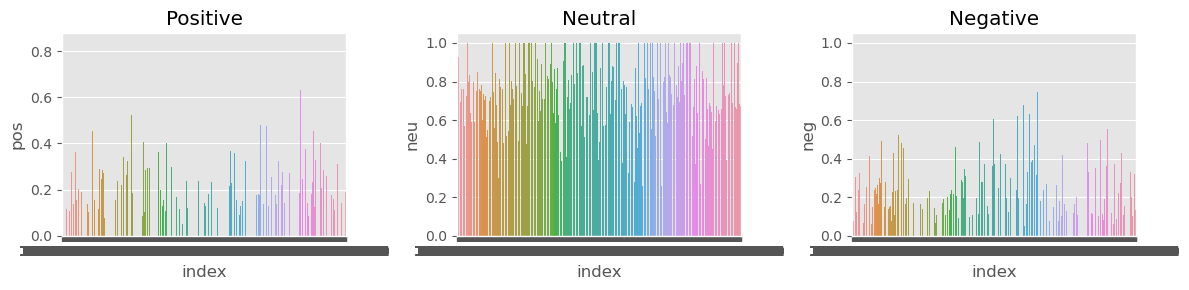

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=views, x ='index', y='pos', ax = axs[0])
sns.barplot(data=views, x ='index', y='neu', ax = axs[1])
sns.barplot(data=views, x ='index', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()